<a href="https://colab.research.google.com/github/sunil5a5/sunil5a5/blob/main/project_Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

Objective:
In this we will build the  model to that can classify the transaction into normal and abnormal

```
# This is formatted as code
```



Action:
Data collection
Data preprocessing and analysing
Train test split
Model creation and model training
Evaluation
Optimization

About dataset:
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

# New Section

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
data= pd.read_csv("/content/creditcard.csv")

In [89]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [90]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [91]:
data.shape

(284807, 31)

In [92]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [93]:
data["Amount"]

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

<Axes: xlabel='Amount', ylabel='Density'>

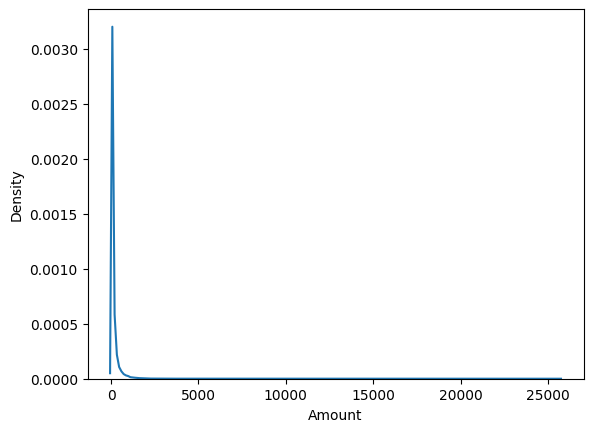

In [94]:
sns.kdeplot(data["Amount"])

<Axes: >

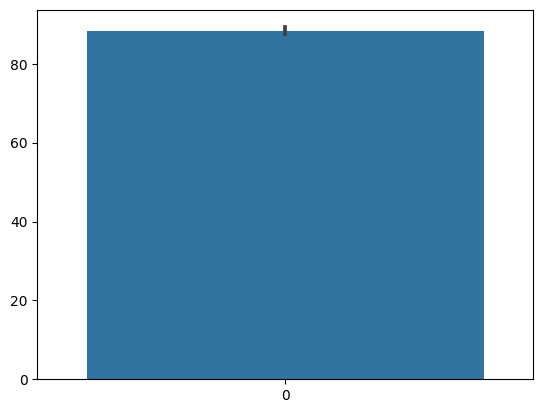

In [95]:
sns.barplot(data["Amount"])

In [96]:
data[data["Amount"]> 2000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653384,-0.711222,0.672900,3828.04,0
1388,1077.0,-3.936794,-3.670519,-1.453820,2.299750,-9.749440,6.456410,10.784088,-2.160016,-0.238116,...,-0.979104,0.957186,2.441960,0.250607,0.300908,1.157867,1.624284,-1.638647,2452.03,0
1632,1264.0,-11.140706,-9.612726,-12.389545,6.013346,-32.092129,21.393069,34.303177,-7.520784,-1.925732,...,-4.709977,1.366110,-2.925888,0.843551,0.746267,0.801387,3.852046,4.157934,7712.43,0
2178,1698.0,-5.849226,-11.754975,-3.333303,3.673246,-4.459583,0.659098,4.527224,-0.985512,0.237794,...,2.160870,-1.992179,-3.240351,0.609619,-0.985548,0.089693,-0.713355,0.653060,3669.00,0
2453,2019.0,-3.687481,-8.746635,-2.057885,1.858936,-3.353004,1.580542,2.399114,-0.318630,-1.045750,...,1.230193,-1.573274,-2.122351,-0.141325,-0.838373,0.251148,-0.440547,0.445717,2540.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281375,170137.0,-1.965632,1.301630,-4.354657,2.757797,-13.289029,10.085792,15.364280,-4.554727,-2.568326,...,0.131940,-0.407096,-0.525327,1.004851,-0.226852,-0.179945,2.326879,-1.326722,3100.00,0
281611,170302.0,-5.034683,-12.155822,-4.527769,2.219104,-4.375383,0.380424,4.385223,-1.140605,0.892836,...,2.058558,-2.221445,-2.833333,0.145944,-1.957437,-0.052993,-0.720871,0.593201,3670.00,0
283315,171514.0,-2.740984,-2.586374,-5.803083,-0.812563,-10.954787,6.380773,13.992227,-2.435900,-2.882009,...,-0.236493,0.416872,1.669461,-0.860928,1.011840,1.058176,0.774090,-0.898281,2992.05,0
283395,171560.0,-6.519366,-10.723215,-4.631726,0.074792,-9.973646,7.975968,12.793781,-0.541910,-2.328088,...,2.215869,-0.362451,9.113598,-1.460900,0.602284,-0.693933,-1.111301,0.444162,3820.86,0


In [97]:
data[data["Amount"]> 20000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.34736,-3.872425,...,-21.62012,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0


In [98]:
data[data["Amount"]> 10000]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


In [99]:
data["Class"]

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [100]:
count= data["Class"].value_counts()

In [101]:
data["Class"].value_counts()/data.shape[0]*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

<Axes: xlabel='Class', ylabel='count'>

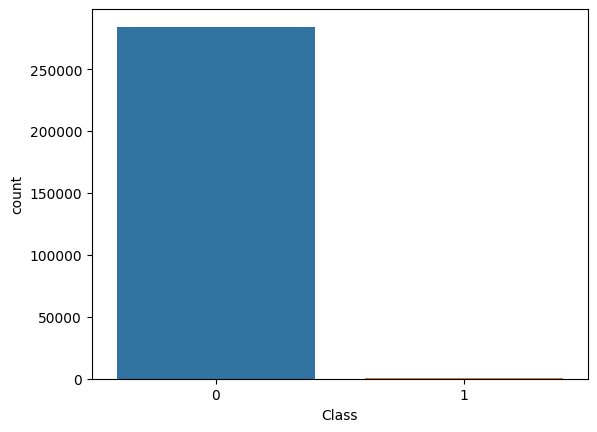

In [102]:
sns.countplot(data= data, x="Class")

([<matplotlib.patches.Wedge at 0x7ea83ef5f460>,
 [Text(-1.09998380137016, 0.0059696501784341355, '0'),
  Text(1.0999838018177286, -0.005969567707642625, '1')])

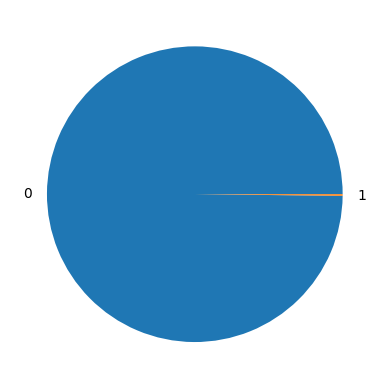

In [103]:
plt.pie(count.values, labels= count.index)

In [104]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [105]:
data.duplicated().sum()

1081

In [106]:
data.shape

(284807, 31)

In [107]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [108]:
data["Class"][data.duplicated()].value_counts()

0    1062
1      19
Name: Class, dtype: int64

In [109]:
data.drop_duplicates(inplace= True)

In [110]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [111]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<Axes: xlabel='Amount', ylabel='Density'>

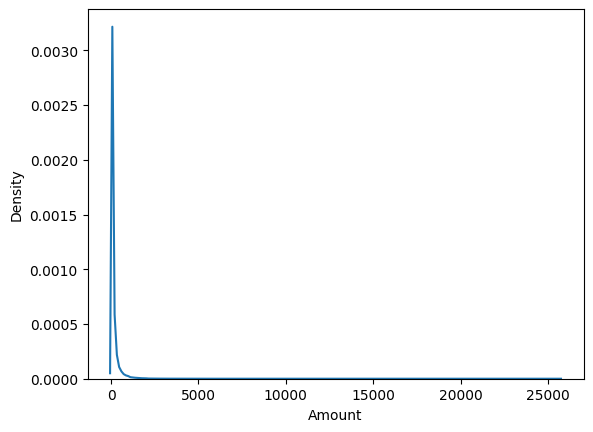

In [112]:
sns.kdeplot(data["Amount"])

In [113]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

<Axes: xlabel='Time', ylabel='Density'>

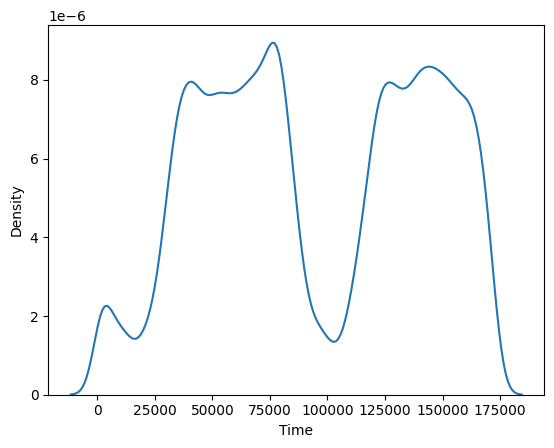

In [114]:
sns.kdeplot(data["Time"])

In [115]:
from sklearn.preprocessing import RobustScaler
scaler= RobustScaler()

In [131]:
data["Time"]= scaler.fit_transform(data[["Time"]])
data["Amount"]= scaler.fit_transform(data[["Amount"]])

In [130]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.995290,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,-0.995290,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,-0.995279,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,-0.995279,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,-0.995267,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0


In [118]:
data= data.dropna()

In [179]:
x= data.drop(["Class"], axis =1)
y= data.Class

In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state= 42)

In [189]:
from xgboost import XGBClassifier

In [190]:
xgb_model= XGBClassifier()

In [162]:
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [192]:
ans1= xgb_model.predict(x_test)

In [164]:
ans1

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [165]:
from sklearn.metrics import accuracy_score

In [193]:
accuracy_score(y_test, ans1)*100

99.95241955380115

In [170]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [145]:
one= data[data["Class"]==1]

In [146]:
one

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-0.990519,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.305938,1
623,-0.989744,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,7.050480,1
4920,-0.942854,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,3.030594,1
6108,-0.913192,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,0.514532,1
6329,-0.906929,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.292032,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,0.992435,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.117508,1
280143,0.994844,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.295369,1
280149,0.994891,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.777222,1
281144,1.002118,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.101099,1


In [148]:
zero= data[data["Class"]==0].sample(n=473)

In [149]:
zero

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
134346,-0.046179,-0.602179,0.897894,0.651693,-2.096404,-0.166611,-1.179468,0.484108,0.141583,0.192784,...,-0.055670,-0.175293,-0.131943,-0.062401,-0.108417,-0.166898,-0.010881,0.060600,-0.240857,0
168590,0.406666,-0.867684,-0.410589,1.591933,-1.964853,-0.296435,0.068931,0.283685,0.050740,-1.107070,...,0.407514,0.849871,-0.151894,0.639384,0.748780,0.006406,-0.013472,0.071013,1.487971,0
90765,-0.253069,1.137426,-0.628260,-1.033614,-1.213480,0.420999,0.398951,0.117154,0.094624,1.206138,...,-0.000648,-0.039751,-0.472812,-1.685761,1.006697,-0.438557,0.017989,-0.003052,1.251564,0
7368,-0.878689,-1.462572,1.992656,0.524927,-0.184458,0.228813,-0.523551,0.598031,-0.052174,1.929176,...,-0.635556,-1.150475,-0.022506,-0.591107,0.191884,0.109986,0.733517,0.442019,-0.055764,0
110860,-0.149125,-2.020318,-1.222385,1.954101,-0.278217,-1.471895,2.027641,2.431351,-0.354090,0.089928,...,0.096317,0.877280,-0.015164,-0.171137,0.197135,0.482927,-0.048398,-0.571460,8.681129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57768,-0.430451,-0.445481,0.978165,-0.528718,0.247987,2.228714,3.798810,-0.257228,1.341704,-0.661066,...,-0.010677,-0.078723,-0.124781,1.016681,-0.095471,-0.287924,0.073873,0.099210,-0.212071,0
105649,-0.177035,1.223107,0.432068,0.564661,1.092851,-0.287103,-0.858138,0.196000,-0.240801,-0.137582,...,-0.214378,-0.573931,0.085739,0.380974,0.408339,-0.635368,0.031675,0.033028,-0.207064,0
57746,-0.430592,-0.538077,0.885018,0.787340,-0.603620,1.003086,0.861674,0.445450,0.313469,-0.417010,...,-0.252942,-0.709133,-0.155723,-1.741086,-0.076621,0.181151,0.145030,0.080233,-0.278404,0
125350,-0.083009,0.847188,-0.978006,1.042410,0.257476,-1.310422,0.301739,-0.737288,0.365233,1.113277,...,-0.073918,-0.327588,0.018264,0.268910,-0.088991,0.932302,-0.055067,0.023594,1.703240,0


In [150]:
df= pd.concat((zero, one), axis= 0, ignore_index= True)

In [151]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.046179,-0.602179,0.897894,0.651693,-2.096404,-0.166611,-1.179468,0.484108,0.141583,0.192784,...,-0.055670,-0.175293,-0.131943,-0.062401,-0.108417,-0.166898,-0.010881,0.060600,-0.240857,0
1,0.406666,-0.867684,-0.410589,1.591933,-1.964853,-0.296435,0.068931,0.283685,0.050740,-1.107070,...,0.407514,0.849871,-0.151894,0.639384,0.748780,0.006406,-0.013472,0.071013,1.487971,0
2,-0.253069,1.137426,-0.628260,-1.033614,-1.213480,0.420999,0.398951,0.117154,0.094624,1.206138,...,-0.000648,-0.039751,-0.472812,-1.685761,1.006697,-0.438557,0.017989,-0.003052,1.251564,0
3,-0.878689,-1.462572,1.992656,0.524927,-0.184458,0.228813,-0.523551,0.598031,-0.052174,1.929176,...,-0.635556,-1.150475,-0.022506,-0.591107,0.191884,0.109986,0.733517,0.442019,-0.055764,0
4,-0.149125,-2.020318,-1.222385,1.954101,-0.278217,-1.471895,2.027641,2.431351,-0.354090,0.089928,...,0.096317,0.877280,-0.015164,-0.171137,0.197135,0.482927,-0.048398,-0.571460,8.681129,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,0.992435,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,5.117508,1
942,0.994844,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.295369,1
943,0.994891,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,0.777222,1
944,1.002118,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,3.101099,1


In [152]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.046179,-0.602179,0.897894,0.651693,-2.096404,-0.166611,-1.179468,0.484108,0.141583,0.192784,...,-0.055670,-0.175293,-0.131943,-0.062401,-0.108417,-0.166898,-0.010881,0.060600,-0.240857,0
1,0.406666,-0.867684,-0.410589,1.591933,-1.964853,-0.296435,0.068931,0.283685,0.050740,-1.107070,...,0.407514,0.849871,-0.151894,0.639384,0.748780,0.006406,-0.013472,0.071013,1.487971,0
2,-0.253069,1.137426,-0.628260,-1.033614,-1.213480,0.420999,0.398951,0.117154,0.094624,1.206138,...,-0.000648,-0.039751,-0.472812,-1.685761,1.006697,-0.438557,0.017989,-0.003052,1.251564,0
3,-0.878689,-1.462572,1.992656,0.524927,-0.184458,0.228813,-0.523551,0.598031,-0.052174,1.929176,...,-0.635556,-1.150475,-0.022506,-0.591107,0.191884,0.109986,0.733517,0.442019,-0.055764,0
4,-0.149125,-2.020318,-1.222385,1.954101,-0.278217,-1.471895,2.027641,2.431351,-0.354090,0.089928,...,0.096317,0.877280,-0.015164,-0.171137,0.197135,0.482927,-0.048398,-0.571460,8.681129,0


In [153]:
df.Class.value_counts()

0    473
1    473
Name: Class, dtype: int64

<Axes: xlabel='Class', ylabel='count'>

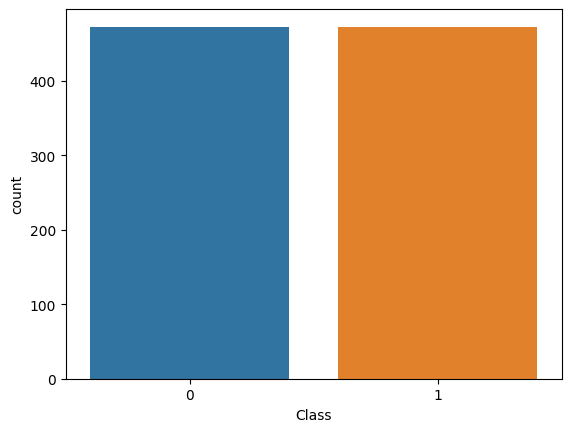

In [154]:
sns.countplot(data= df, x= "Class")

In [156]:
x= df.drop(["Class"], axis= 1)

In [157]:
y= df.Class

In [167]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [195]:
print(classification_report(y_test, ans1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.93      0.76      0.83        90

    accuracy                           1.00     56746
   macro avg       0.97      0.88      0.92     56746
weighted avg       1.00      1.00      1.00     56746



<Axes: >

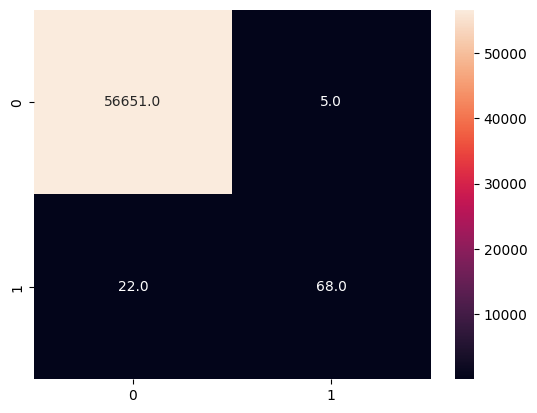

In [194]:
sns.heatmap(confusion_matrix(y_test, ans1), fmt= ".1f", annot= True)

In [173]:
!pip install imblearn

In [174]:
from imblearn.over_sampling import RandomOverSampler

In [175]:
os= RandomOverSampler(random_state= 42)

In [176]:
data.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

In [182]:
x_new, y_new= os.fit_resample(x_train, y_train)

In [183]:
x_new.shape

(453194, 30)

In [184]:
y_new.shape

(453194,)

In [185]:
y_new.value_counts()

0    226597
1    226597
Name: Class, dtype: int64

In [186]:
x_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.315178,-1.353894,-1.081034,1.787587,-1.803254,-0.235223,2.177295,1.014795,0.549627,0.629906,...,0.420106,0.182520,0.367052,0.805029,-0.981966,-0.783392,0.905245,-0.176870,-0.093081,4.116256
1,0.908797,-0.059936,0.582525,-1.369698,-1.100370,3.707608,3.396709,1.218666,0.541196,-0.507983,...,-0.103629,0.069615,0.311566,-0.268906,0.690685,0.463247,-0.637914,-0.121454,-0.196513,0.157419
2,-0.510516,-0.362164,0.715165,1.783253,0.230848,-0.240500,-0.508633,0.589763,-0.013746,-0.048097,...,-0.036132,-0.212595,-0.515372,-0.044853,0.385330,-0.126762,0.139889,0.031010,0.057977,-0.027952
3,0.429041,-0.370982,0.446004,-0.732017,-1.088288,1.799175,-1.117223,1.502962,-0.553382,-0.240976,...,-0.233555,0.263039,0.937860,-0.198459,0.728053,0.203829,-0.522782,-0.376116,-0.103404,-0.218328
4,0.465530,0.695644,0.177228,0.481414,-0.338853,-0.122807,0.074431,-0.509006,-0.775719,0.982836,...,-0.275961,0.956704,0.468104,-0.195806,0.709315,0.487912,-0.246186,0.196872,0.197452,-0.167014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453189,-0.306141,-0.451383,2.225147,-4.953050,4.342228,-3.656190,-0.020121,-5.407554,-0.748436,-1.362198,...,0.724381,-0.575924,0.495889,1.154128,-0.016186,-2.079928,-0.554377,0.455179,0.001321,1.278264
453190,0.019784,-0.670238,0.945206,0.610051,2.640065,-2.707775,1.952611,-1.624608,-5.229908,0.210202,...,1.474929,-2.504450,1.436472,0.351542,0.648467,0.579681,0.075738,0.346717,0.282209,4.196496
453191,0.107429,-3.765680,5.890735,-10.202268,10.259036,-5.611448,-3.235376,-10.632683,3.272716,-5.268905,...,1.194137,2.245606,0.546321,0.381853,0.382025,-0.821036,0.394355,1.412961,0.782407,-0.305799
453192,0.523302,1.177824,2.487103,-5.330608,5.324547,1.150243,-1.281843,-1.171994,0.413778,-2.659840,...,0.156057,0.262325,-0.431790,-0.092088,0.145216,0.457788,0.167739,0.451243,0.268421,-0.238214


In [191]:
xgb_model.fit(x_new, y_new)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)